___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 9<br><br>RNN Syntax Basics<br><br>Sine Wave<br><h1>

# RNN Syntax Basics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Creating Data

Datamizi (sequence'i) kendimiz olusturacagiz. __linspace__ ile 0 ile 50 arasinda 501 sayi belirledik. Bu noktalarin sin degerlerini aldik ve bu degerleri de y' ye atadik. 

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

Amacimiz, datasetinin siradaki degerlerini tahmin ederek forecast yapmak :

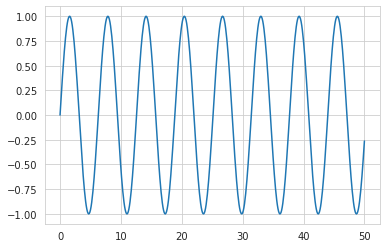

In [5]:
plt.plot(x,y)

Let's turn this into a DataFrame

In [6]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

Tek feature li bir dataframe olustu :

In [7]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


## Preprocessing of Data

### Train Test Split

In [8]:
len(df)

501

Simdiye kadar test ve train datalarini ayirirken random olarak bir bölme islemi yapiyorduk. Burda ise datamizi random olarak bölmeyecegiz cunku datamizin sirasi önemli. Bu yüzden datamizin son kismindan belli bir bölümü test datasi olarak ayiracagiz.

In [9]:
test_percent = 0.15

%15' lik kisim, datasetimizde 75. indexe karsilik geliyor :

In [10]:
len(df)*test_percent

75.14999999999999

Küsurattan kurtulmak icin round ile datanin 75' e kadar olan uzunlugunu bir degiskene atadik :

In [11]:
test_point = np.round(len(df)*test_percent)
test_point

75.0

Bu degeri df' in gercek uzunlugundan cikarirsak elimize train kismi icin kullanacagimiz data kalir. Bastan 426' ya kadar olan data train datasi, sonrasi ise test datasi olacak  :

In [12]:
test_ind = int(len(df) - test_point)
test_ind

426

Train datasi olarak test_ind' e kadar olan kismi, test datasi olarak da test_ind' den sonraki kismi aldik :

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
train

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
42.100,-0.952
42.200,-0.978
42.300,-0.994
42.400,-1.000


In [15]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


### Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

__TimeSeriesGenerator --->__ CNN' deki ImageDataGenerator ile benzer islemleri yapar.

Generator icinde __data__ ve __targets__ olarak __train_scaled__ datasini kullandik. Cunku RNN' de tahmin yapacak feature ile target label ayni feature.

__length=3 --->__ sequence' lerin uzunlugu. "3 satirdan aldigin bilgiye göre 4.' yü tahmin et."

__batch_size --->__ 'Bir batch' de yukardaki şarta gore kac data olacak?' Biz burda tek tek yaptik fakat buyuk datasetlerinde bunu yapmak mümkün degil. (Tavsiye edilen, mümkünse tek tek yapilmasidir.)

__stride=1 --->__ Ilk 2 veriden sonra 3. tahmin edilecek; sonra bir adim kayilarak 2 ve 3'e göre 4 tahmin edilecek. Bu islem sona kadar devam edecek.

In [20]:
#help(TimeseriesGenerator)

In [21]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
stride = 1 # Period between successive output sequences
generator = TimeseriesGenerator(data = train_scaled,                   # train datasi
                                targets = train_scaled,                
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

In [22]:
len(train_scaled)

426

Scale edilmis data 426 tane olmasina ragmen Generator, 426 tane data olusturdu. __length=2__ oldugu icin datasetinin son iki degerinden sonra tahmin islemini yapacagi bir data kalmiyor. Bu yuzden son iki satiri kullanamaz. Generator sayisi;__len(generator)= (len(train)-lenght)/(batch_size*stride)__ formulu ile hesaplanir.

In [23]:
len(generator) # = (len(train)-lenght)/(batch_size*stride) 

424

In [24]:
generator

Generator, 0. index' te t_train ve y_train degerlerini verdi. x_train' de length uzunlugundan dolayi 2 deger var. Bu iki degere gore 3. deger tahmin edilecek :

In [25]:
generator[0]

(array([[[0.49999912],
         [0.54991622]]]), array([[0.59933458]]))

In [26]:
# What does the first batch look like?
X, y = generator[0]

Generator' i daha rahat gorebilmek icin X ve y' ye attik. Sonra yazdirdik. Verilen array' ler ve tahmin edilmesi gereken 3. satiri görüyoruz :

In [27]:
print(f'Given the Array: \n{X}')
print(f'Predict this y: \n{y}')

Given the Array: 
[[[0.49999912]
  [0.54991622]]]
Predict this y: 
[[0.59933458]]


Ilk 3 degeri asagida train_scaled datasinda da gorebiliriz :

In [28]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

Asagidaki parametre degerlerini degistirdik ve önceki ile farki kiyasladik :

In [29]:
# define generator
length = 3 # Length of the output sequences (in number of timesteps)
batch_size = 2 # Number of timeseries samples in each batch
stride = 2 # Period between successive output sequences
generator = TimeseriesGenerator(data = train_scaled,                   # train datasi
                                targets = train_scaled,                 
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

In [30]:
len(train_scaled)

426

106 tane generator üretti. (426 - 3)/(2 *2) = 106

In [31]:
generator

Ilk üclüden 0.64776041 degerini sonraki üclüden ise 0.73971381 degerini tahmin edecek :

In [32]:
generator[0]

(array([[[0.49999912],
         [0.54991622],
         [0.59933458]],
 
        [[0.59933458],
         [0.64776041],
         [0.69470985]]]), array([[0.64776041],
        [0.73971381]]))

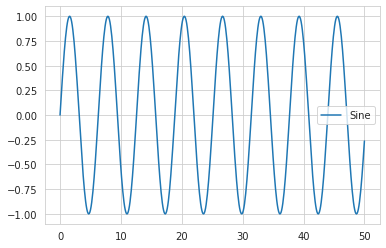

In [33]:
df.plot();

The more length the more training time

__Length degeri nasil hesaplanmali? :__ Kendini yenileyen bir periyot elde etmemiz gerekir. Ilk degerimiz 0' dan baslamis, o zaman tekrar 0 degerine geldiginde bir periyot tamamlanmis olur. Datada 501 tane nokta var, buna dayanarak hesaplama yaparsak ilk periyodun tamamlandigi noktayi 64 olarak buluruz. 64' te bir kendini tekrar eden bir periyot var diyebiliriz. batch_size=1 secerek generator' i olusturduk :

In [34]:
length = 64 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

In [35]:
# What does the first batch look like?
X, y = generator[0]

426 - 64 = 362 tane generator olustu :

In [36]:
len(generator)

362

64 veri modele verilecek,  bunlara göre 65. sayi tahmin edilecek :

In [37]:
print(f'Given the Array: \n{X.flatten()}')    # Bütün rakamlari görmek icin flatten yaptik. 
print(f'Predict this y: \n{y}')

Given the Array: 
[4.99999116e-01 5.49916225e-01 5.99334579e-01 6.47760405e-01
 6.94709850e-01 7.39713809e-01 7.82322618e-01 8.22110545e-01
 8.58680040e-01 8.91665714e-01 9.20737985e-01 9.45606372e-01
 9.66022399e-01 9.81782075e-01 9.92727935e-01 9.98750612e-01
 9.99789928e-01 9.95835500e-01 9.86926839e-01 9.73152957e-01
 9.54651478e-01 9.31607263e-01 9.04250562e-01 8.72854714e-01
 8.37733417e-01 7.99237589e-01 7.57751870e-01 7.13690771e-01
 6.67494535e-01 6.19624741e-01 5.70559686e-01 5.20789614e-01
 4.70811810e-01 4.21125636e-01 3.72227539e-01 3.24606094e-01
 2.78737119e-01 2.35078919e-01 1.94067715e-01 1.56113277e-01
 1.21594831e-01 9.08572769e-02 6.42077324e-02 4.19124713e-02
 2.41942605e-02 1.12301346e-02 3.14962674e-03 3.34747619e-05
 1.91281421e-03 8.76886734e-03 2.05331307e-02 3.70880598e-02
 5.82682430e-02 8.38620552e-02 1.13613771e-01 1.47226122e-01
 1.84363264e-01 2.24654135e-01 2.67696162e-01 3.13059283e-01
 3.60290246e-01 4.08917133e-01 4.58454081e-01 5.08406134e-01]
Predi

## Modelling

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [39]:
# We're only using one feature in our time series
n_features = 1

In [40]:
seed = 42

Modele bir adet hidden layer ekledik. 

__units= 100 -->__  Hidden layer' da 100 tane nöron olsun.

__input_shape=(length, n_features)) -->__ Ilk eleman satir sayisi, ikinci eleman sütun sayisini verir. length=64 satir sayisi, n_features=1 sütun sayisi.

__model.add(Dense(units = 1)) -->__ Output layer' da 1 nöron var. (Regression analizi yaptigimiz icin tek bir nöron olmali.)

In [41]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 100, activation = "tanh", input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(units = 1))   

model.compile(optimizer='adam', loss='mse')

Hidden layer' da cok fazla parametre var. ANN modeli kursaydik cok daha az parametre olurdu. (Simple RNN yerine LSTM kullansaydik, 4 gate oldugu icin 4 kat parametremiz olacakti) :

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


Parametre sayisini bulmak icin formul :

In [43]:
# params = 1 * ((size_of_input + 1) * size_of_output + size_of_output^2)
1 * ((1+1)*100+(100**2))

10200

In [44]:
model.fit_generator(generator = generator, epochs = 5)

Epoch 1/5
362/362 [==============================] - 9s 19ms/step - loss: 0.0047
Epoch 2/5
362/362 [==============================] - 7s 19ms/step - loss: 3.8681e-04
Epoch 3/5
362/362 [==============================] - 3s 10ms/step - loss: 1.4184e-04
Epoch 4/5
362/362 [==============================] - 3s 9ms/step - loss: 9.0954e-05
Epoch 5/5
362/362 [==============================] - 3s 9ms/step - loss: 0.0961


Elimizde validation datasi olmadigi icin overfit durumu var mi yok mu göremiyoruz :

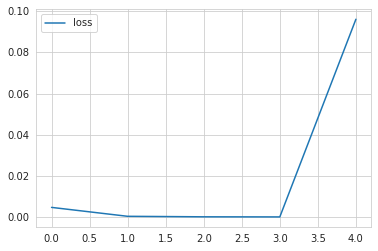

In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

## Evaluate on Test Data

Datayi degerlendirmek icin train datasi üzerine forecast yapmamiz gerekir. 

__length__ uzunlugumuz kac ise sondan o kadarlik datayi alacagiz ve bu verilere gore bir sonraki adimi tahmin etmeye calisacagiz. Yaptigimiz tahmini de dataya katarak sequence' i bir ileri tasiyacagiz ve bir sonraki adimi tahmin etmeye calisacagiz. Bu sekilde yeni tahminleri de sona ekleyerek sirayla sonraki adimlari tahmin ederek istedigimiz adim kadar gidecegiz. (length uzunlugu kadar forecast yapilmasi önerilir). Buradaki datamiz basit bir data oldugu icin forecast islemini uzatabiliriz.

In [46]:
first_eval_batch = train_scaled[-length:]

Datanin sonundan __length__ kadar olan veriyi aldik (Son 64 deger) :

In [47]:
first_eval_batch.shape

(64, 1)

Datanin shape' i (64,1) fakat modelin bekledigi shape, (1,64,1) yani 3 boyutlu.

In [48]:
generator[0][0].shape

(1, 64, 1)

Boyut degistirme icin 2 yöntem var. Ilki, basina 1 koyarak boyutu 2' den 3' e cikarma. Ikincisi ise __expand_dim__ fonksiyonu :

In [49]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))
# first_eval_batch = np.expand_dims(first_eval_batch, axis=0)

In [50]:
first_eval_batch.shape

(1, 64, 1)

Boyutunu modele gore uyarladigimiz datayi prediction icin verebiliriz. Model, datadaki 64 degere göre 65. degerin ne oldugunu tahmin edecek :

In [51]:
model.predict(first_eval_batch)

array([[0.6003226]], dtype=float32)

Buldugumuz bu tahmini, test datasinin ilk elemani ile kiyaslayacagiz. Model gercekten bu degere yakin bir tahmin yapti. Yapilan prediction 2 boyutlu bir array :

In [52]:
test_scaled[0]

array([0.00885189])

__ÖZETLE ;__ test_prediction isimli bos bir kume olusturduk. Bu bos kumenin icine yaptigimiz prediction' lari atacagiz. first_eval_batch degiskenine train datasinin son length uzunlugu kadar olan datayi attik, reshape ile boyutunu 2 boyuttan 3' e cikardik. Asagidaki for döngüsünün icine bunlari tanimlayacagiz : 

In [53]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [54]:
current_batch.shape

(1, 64, 1)

In [55]:
current_batch    # 64' lü data

array([[[1.27922981e-03],
        [7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.7

Yukarida modelimize, 64 degere gore 65. degeri tahmin ettirmistik (0.0085). Bastaki degeri attik onun yerine buldugumuz 65. prediction degerini __np.append__ yöntemi ile son kisma ekledik :

__np.append__ icine bir array, array' in altina eklenecek prediction degeri ve hangi axis' e eklenmesi gerektigi bilgisini ister. 

__current_batch[:,1:,:] --->__ 1 yazdigimiz kisim satir sayisini ifade ettigimiz kisim. Bu kismi degistirerek indexi 0' dan degil, 1' den baslatmasini söylemis olduk. (En sondaki nokta sütun sayisi). Bu islemden sonra satir sayisi 63' e düstü. Sonuna yeni buldugumuz prediction degerini 3 boyutlu hale getirerek ekledik. Boylece sample sayisi yine 64' e tamamlanmis oldu.

In [56]:
np.append(current_batch[:,1:,:], [[[0.0085]]], axis = 1)

array([[[7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.72558686e-01],
        [8.3

### Final For Loop to predict step by step 

Yukarida yaptigimiz islemin aynisini for döngüsü ile 75 test datasi boyunca yapacagiz. Yukarida yazdigimiz kodlarin aynisini for döngüsü icine tanimladik. Test datasinin uzunlugu boyunca her islemde prediction yapacak ve yaptigi prediction' i tanimlanan bos liste icine atacak. Son olarak current_batch' i güncelleyerek her seferinde gelen yeni tahmini ekleyip bastan bir sample cikaracak. Burdan cikan forecast sonuclarini daha sonra test datasi ile kiyaslayacagiz :

In [57]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

Forecast isleminde yapilan prediction' lar :

In [58]:
predictions_scaled

[array([0.6003226], dtype=float32),
 array([0.7198344], dtype=float32),
 array([0.7597366], dtype=float32),
 array([0.76583517], dtype=float32),
 array([0.7665895], dtype=float32),
 array([0.7666304], dtype=float32),
 array([0.76670283], dtype=float32),
 array([0.76672703], dtype=float32),
 array([0.76674235], dtype=float32),
 array([0.76674736], dtype=float32),
 array([0.7667497], dtype=float32),
 array([0.7667501], dtype=float32),
 array([0.76675045], dtype=float32),
 array([0.76675045], dtype=float32),
 array([0.7667507], dtype=float32),
 array([0.7667506], dtype=float32),
 array([0.76675034], dtype=float32),
 array([0.76675045], dtype=float32),
 array([0.7667506], dtype=float32),
 array([0.76675045], dtype=float32),
 array([0.7667507], dtype=float32),
 array([0.76675034], dtype=float32),
 array([0.7667507], dtype=float32),
 array([0.76675045], dtype=float32),
 array([0.76675045], dtype=float32),
 array([0.76675045], dtype=float32),
 array([0.76675045], dtype=float32),
 array([0.766

Test datasindaki gercek degerler :

In [59]:
test_scaled

array([[8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],
       [5.58715219e-01],
       [6.07993616e-01],
       [6.56192968e-01],
       [7.02831682e-01],
       [7.47443761e-01],
       [7.89583454e-01],
       [8.28829716e-01],
       [8.64790412e-01],
       [8.97106234e-01],
       [9.25454293e-01],
       [9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],


## Inverse Transformations and Comparing

Gercek degerler ile prediction' lari kiyaslamadan once prediction degerlerini __inverse_transform__ ile gercek degerlere donusturduk ki kiyaslama yapabilelim :

In [60]:
predictions = scaler.inverse_transform(predictions_scaled)

In [61]:
predictions

array([[0.20064537],
       [0.43966701],
       [0.51947079],
       [0.53166783],
       [0.53317653],
       [0.53325831],
       [0.53340315],
       [0.53345155],
       [0.53348218],
       [0.5334922 ],
       [0.53349685],
       [0.53349768],
       [0.5334984 ],
       [0.5334984 ],
       [0.53349887],
       [0.53349863],
       [0.53349816],
       [0.5334984 ],
       [0.53349863],
       [0.5334984 ],
       [0.53349887],
       [0.53349816],
       [0.53349887],
       [0.5334984 ],
       [0.5334984 ],
       [0.5334984 ],
       [0.5334984 ],
       [0.53349863],
       [0.53349863],
       [0.53349911],
       [0.5334984 ],
       [0.53349863],
       [0.5334984 ],
       [0.53349816],
       [0.53349911],
       [0.53349923],
       [0.53349887],
       [0.53349887],
       [0.53349887],
       [0.53349887],
       [0.53349863],
       [0.53349863],
       [0.53349816],
       [0.5334984 ],
       [0.53349863],
       [0.5334984 ],
       [0.53349863],
       [0.533

In [62]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


Test datasina predictions' lari yeni bir sütun olarak ekledik :

In [63]:
test['RNN_Predictions'] = predictions

In [64]:
test

,Sine,RNN_Predictions
42.600,-0.982,0.201
42.700,-0.959,0.440
42.800,-0.925,0.519
42.900,-0.883,0.532
43.000,-0.832,0.533
...,...,...
49.600,-0.617,0.533
49.700,-0.536,0.533
49.800,-0.449,0.533
49.900,-0.357,0.533


Gercek degerler ile prediction degerleri oldukca uyumlu :

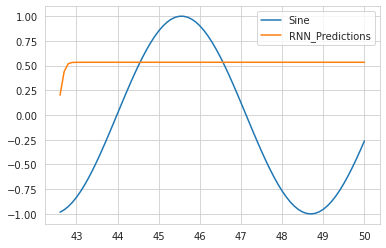

In [65]:
test.plot();

## Early Stopping and Validation Generator

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

EarlyStop eklemek icin validation_data olmasi gerekir. validation_datasini Generator islemi icin hazirlamamiz gerekecek.

In [67]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

Yukaridaki generator isleminin aynisini yaptik; ilave olarak validation_generator tanimladik fakat data ve target olarak test datasini tanimladik. Bu sekilde validation_data' sini ürettik :

In [68]:
length = 64 # lenght range have to be shorter than range of test data
            # In this case lenght range = 64, test range = 75
batch_size =1

generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

validation_generator = TimeseriesGenerator(data = test_scaled, targets = test_scaled, length = length, batch_size = batch_size)

test range=75, length range=64 idi. validation_generator' i tanimlarken length' i 64' ten kücük bir sayi secseydik, TimeseriesGenerator bize herhangi bir sonuc üretemezdi. Bir sonuc üretebilmesi icin en az 65 olmasi gerekir ki elimizde 75 adet var. validation_generator bize 11 adet validation datasi üretmis :

In [69]:
len(validation_generator)

11

## LSTM

Modelimizi bu sefer LSTM ile olusturacagiz. LSTM layer' da LSTM' i belirtmemiz disinda yaptigimiz farkli bir islem yok :

In [70]:
# define model
model = Sequential()

# LSTM layer
model.add(LSTM(units = 100, activation = "tanh", input_shape = (length, n_features)))

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse')

LSTM ile parametre sayimiz simple RNN' e göre 4' e katladi :

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [72]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))

40800

EarlyStop da kullanabildigimiz icin 20 epoch verdik ve modelimizi egittik :

In [73]:
model.fit_generator(generator = generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    callbacks = [early_stop])

Epoch 1/20
362/362 [==============================] - 10s 24ms/step - loss: 0.0129 - val_loss: 1.5836e-05
Epoch 2/20
362/362 [==============================] - 8s 22ms/step - loss: 6.3551e-05 - val_loss: 1.1483e-05
Epoch 3/20
362/362 [==============================] - 8s 22ms/step - loss: 0.0011 - val_loss: 6.2347e-06
Epoch 4/20
362/362 [==============================] - 8s 22ms/step - loss: 3.2449e-05 - val_loss: 7.8412e-06
Epoch 5/20
362/362 [==============================] - 8s 22ms/step - loss: 4.1979e-05 - val_loss: 1.0644e-05


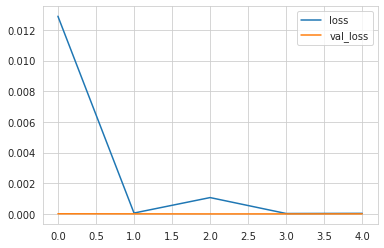

In [74]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

Yukarida yaptigimiz gibi for döngüsü ile prediction' larimizi aldik :

In [75]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

Prediction' lari gercek degerlere dönüştürdük ve buldugumuz sonuclari test datasinin sonuna ekledik :

In [76]:
predictions = scaler.inverse_transform(predictions_scaled)   
test['LSTM Predictions'] = predictions
test

,Sine,RNN_Predictions,LSTM Predictions
42.600,-0.982,0.201,-0.974
42.700,-0.959,0.440,-0.950
42.800,-0.925,0.519,-0.917
42.900,-0.883,0.532,-0.874
43.000,-0.832,0.533,-0.824
...,...,...,...
49.600,-0.617,0.533,-0.568
49.700,-0.536,0.533,-0.491
49.800,-0.449,0.533,-0.409
49.900,-0.357,0.533,-0.322


LSTM de RNN'e benzer sonuclar verdi. LSTM' in avantajlarini burada göremedik çünkü datamiz basic bir data. Daha karmasik sequence' lerde LSTM daha yüksek skorlar verir :

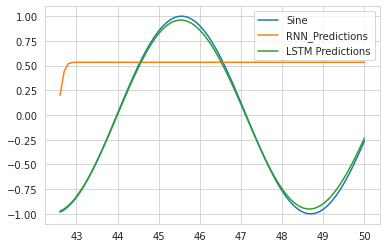

In [77]:
test.plot();

## Retrain and Forecasting

Model performansimiza baktiktan sonra tüm data ile modeli olusturup forecast yapacagiz. Tüm dataya scale islemi uyguladik :

In [78]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

TimeseriesGenerator icindeki data ve target kisimlarina tüm datayi verdik. length ve batch_size degerlerini egitimdeki ile ayni verdik :

In [79]:
length = 64 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

En son olusturdugumuz LSTM modeli ile ayni degerlerle modelimizi olusturduk. Sadece epoch sayisini 6' ya düşürdük cünkü yukarida model 5 epoch' da egitimini tamamlamisti. Validation datasi olmadigi icin EarlyStop koyamiyoruz. Bu yüzden 6 epoch vererek egitimi tamamladik :

In [80]:
model = Sequential()
model.add(LSTM(100, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit_generator(generator, epochs = 6)

Epoch 1/6
437/437 [==============================] - 12s 22ms/step - loss: 0.0084
Epoch 2/6
437/437 [==============================] - 10s 22ms/step - loss: 1.8938e-04
Epoch 3/6
437/437 [==============================] - 11s 26ms/step - loss: 6.0667e-04
Epoch 4/6
437/437 [==============================] - 10s 22ms/step - loss: 2.2042e-05
Epoch 5/6
437/437 [==============================] - 10s 22ms/step - loss: 2.7367e-05
Epoch 6/6
437/437 [==============================] - 10s 22ms/step - loss: 0.0026


Yapacagimiz forecast' in uzunlugu, length kadar yani 64 uzunlugunda olacak.  Forecast sonuclarini herhangi bir seyle kiyaslayamayacagiz. Sadece tahminleri orjinal df' in devamina ekleyerek görsellestirecegiz.

In [81]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [82]:
forecast = scaler.inverse_transform(forecast)

In [83]:
forecast

array([[-0.16459877],
       [-0.06502197],
       [ 0.03505879],
       [ 0.13459   ],
       [ 0.23249426],
       [ 0.32769141],
       [ 0.41911752],
       [ 0.50574395],
       [ 0.58659665],
       [ 0.66077475],
       [ 0.72746502],
       [ 0.78596066],
       [ 0.83566589],
       [ 0.87610613],
       [ 0.90693006],
       [ 0.92791001],
       [ 0.93893369],
       [ 0.94000263],
       [ 0.93121769],
       [ 0.91277425],
       [ 0.8849496 ],
       [ 0.84809169],
       [ 0.80261836],
       [ 0.74900143],
       [ 0.68777126],
       [ 0.61950602],
       [ 0.54483773],
       [ 0.46444602],
       [ 0.37906305],
       [ 0.28947131],
       [ 0.19650383],
       [ 0.10104347],
       [ 0.00401563],
       [-0.09361319],
       [-0.19084928],
       [-0.28668044],
       [-0.38009215],
       [-0.47008062],
       [-0.55567139],
       [-0.63593448],
       [-0.70999987],
       [-0.77707119],
       [-0.83643691],
       [-0.88747906],
       [-0.92967958],
       [-0

In [84]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


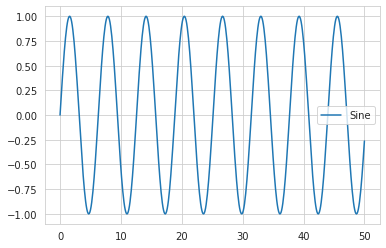

In [85]:
df.plot()

Tahminleri ve orjinal df' i görsellestirmek icin forecast' lere index olusturmamiz gerekir. Bu index' lerin de df' e uygun olmasi gerekir. df' teki index' ler 0.1 steplerle gitmis ve en son 50.00' da bitmis. Forecast' ler de bunun arkasina gelecek sekilde 50.1, 50.2 seklinde gitmeli.

In [86]:
forecast_len = len(forecast)
forecast_len

64

In [87]:
step = 0.1

In [88]:
forecast_len * step

6.4

forecast' indexi 50.1' den baslayacak üzerine toplamda 6.4 eklenecek ve 56.5' e kadar gelecek. step=0.1 olacak. Bu sekilde 64 tane index olusturduk ve bir degiskene atadik :

In [89]:
forecast_index = np.arange(50.1, 56.5, step = step)

In [90]:
len(forecast_index)

64

Iki plot' u beraber cizdirerek bir görsel elde ettik. df indexi ve df sütunu ile bir plot islemi yaptik. forecast indexi ile de forecast' i vererek diger plot islemini yaptik. Forecast tahminlerini datanin sonunda gormus olduk. (Her calistirmada farkli sonuclar alinabilir.)

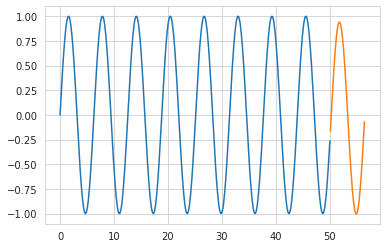

In [91]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast);

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___